# Shallow methods

The survey conducted by "Cognitive Systems Europe" shows that the majority of data scientists uses simple methods for on a daily basis.

https://towardsdatascience.com/we-are-ready-to-ml-explainability-2e7960cb950d

In [16]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [6.0, 6.0]

## Linear regression

Linear regression is the simplest linear method used for modelling the relationship between the independent variables and the dependent ones. It tries to estimate it by finding a line which is as close as possible to all the data points. 

### Boston housing

[Boston housing](https://www.kaggle.com/c/boston-housing) is a very simple dataset built from some statistical data of the houses of Boston suburbs and the median prices (in $1000s) of owner-occupied homes for each zone.

In [6]:
import pandas as pd
from sklearn.datasets import load_boston


boston_data = load_boston(return_X_y=False)

boston_housing_df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
boston_housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are several features in the dataset:

* **crim**  per capita crime rate by town.
* **zn** proportion of residential land zoned for lots over 25,000 sq.ft.
* **indus** proportion of non-retail business acres per town.
* **chas** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **nox** nitrogen oxides concentration (parts per 10 million).
* **rm** average number of rooms per dwelling.
* **age** proportion of owner-occupied units built prior to 1940.
* **dis** weighted mean of distances to five Boston employment centres.
* **rad** index of accessibility to radial highways.
* **tax** full-value property-tax rate per \$10000
* **ptratio** pupil-teacher ratio by town.
* **black** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* **lstat** lower status of the population (percent).
* **medv** median value of owner-occupied homes in \$1000s.

The target variable is called *medv*.

### 2D linear regression

For the simplicity, we'll consider a 2D example and try to predict the *medv* (median value), given *crim* (per capita crime rate). 

<IPython.core.display.Javascript object>


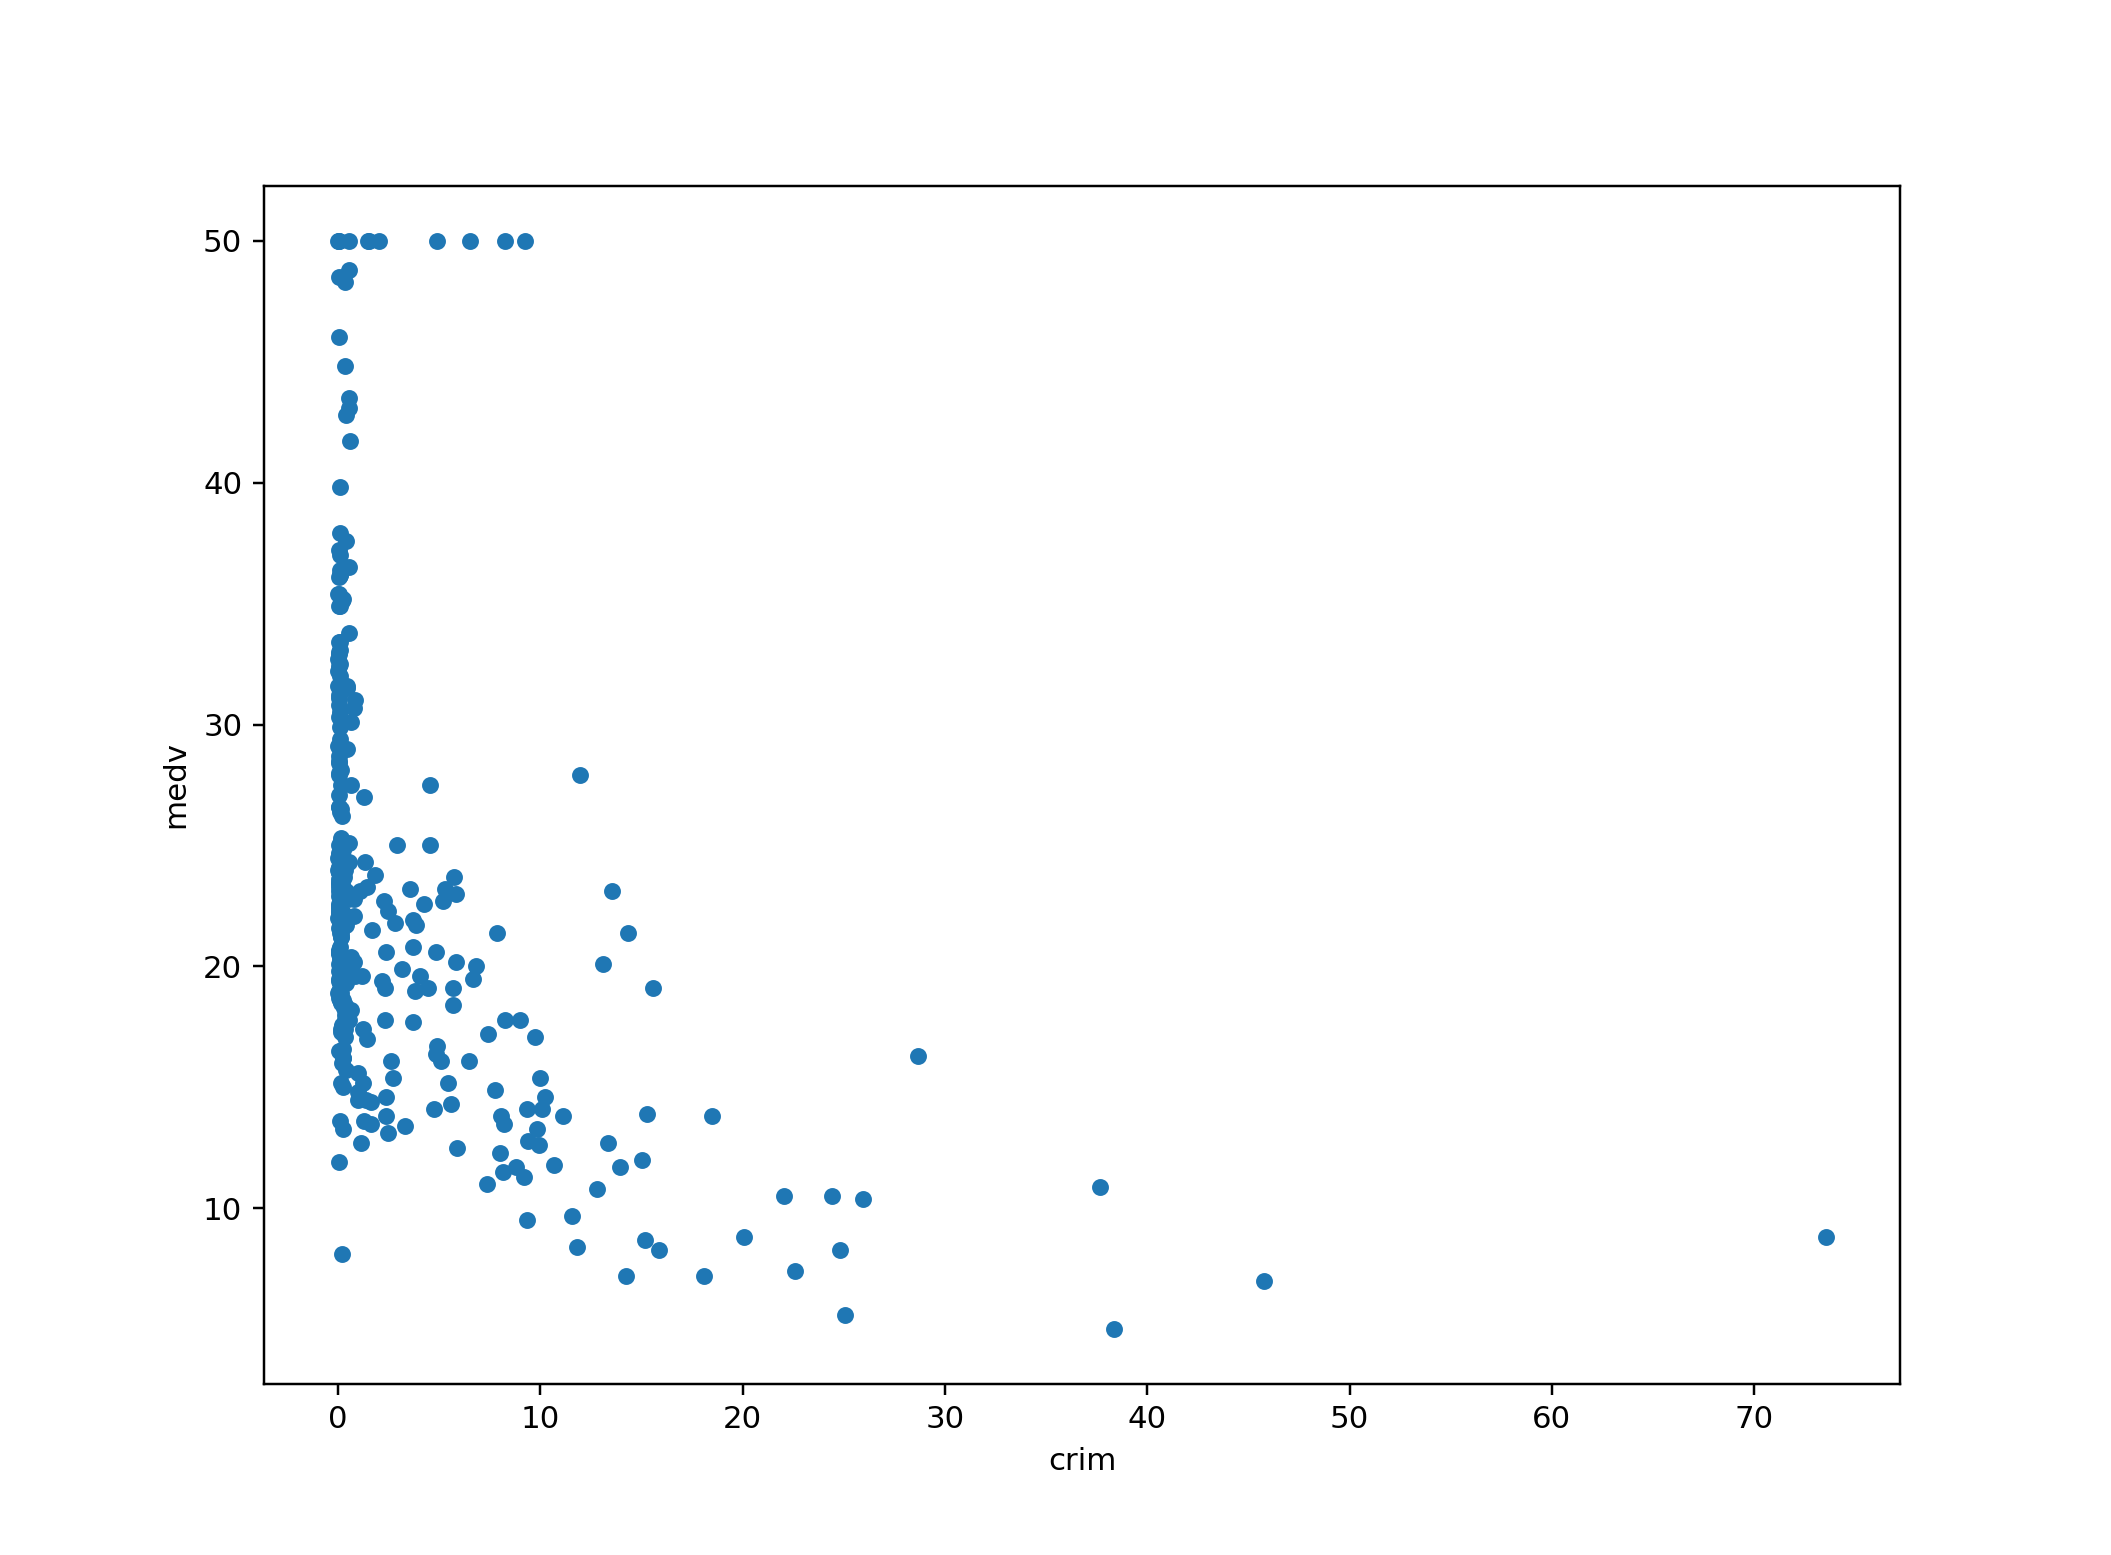

In [3]:
# Display a scatter plot: crim vs medv
boston_housing_df.plot(x="crim", y="medv", kind="scatter")

In [4]:
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression and find the coeffs
linear_regression = LinearRegression()
linear_regression.fit(X=boston_housing_df[["crim"]], 
                      y=boston_housing_df["medv"])
linear_regression.coef_, linear_regression.intercept_ 

(array([-0.50838289]), 24.4771088799097)

<IPython.core.display.Javascript object>


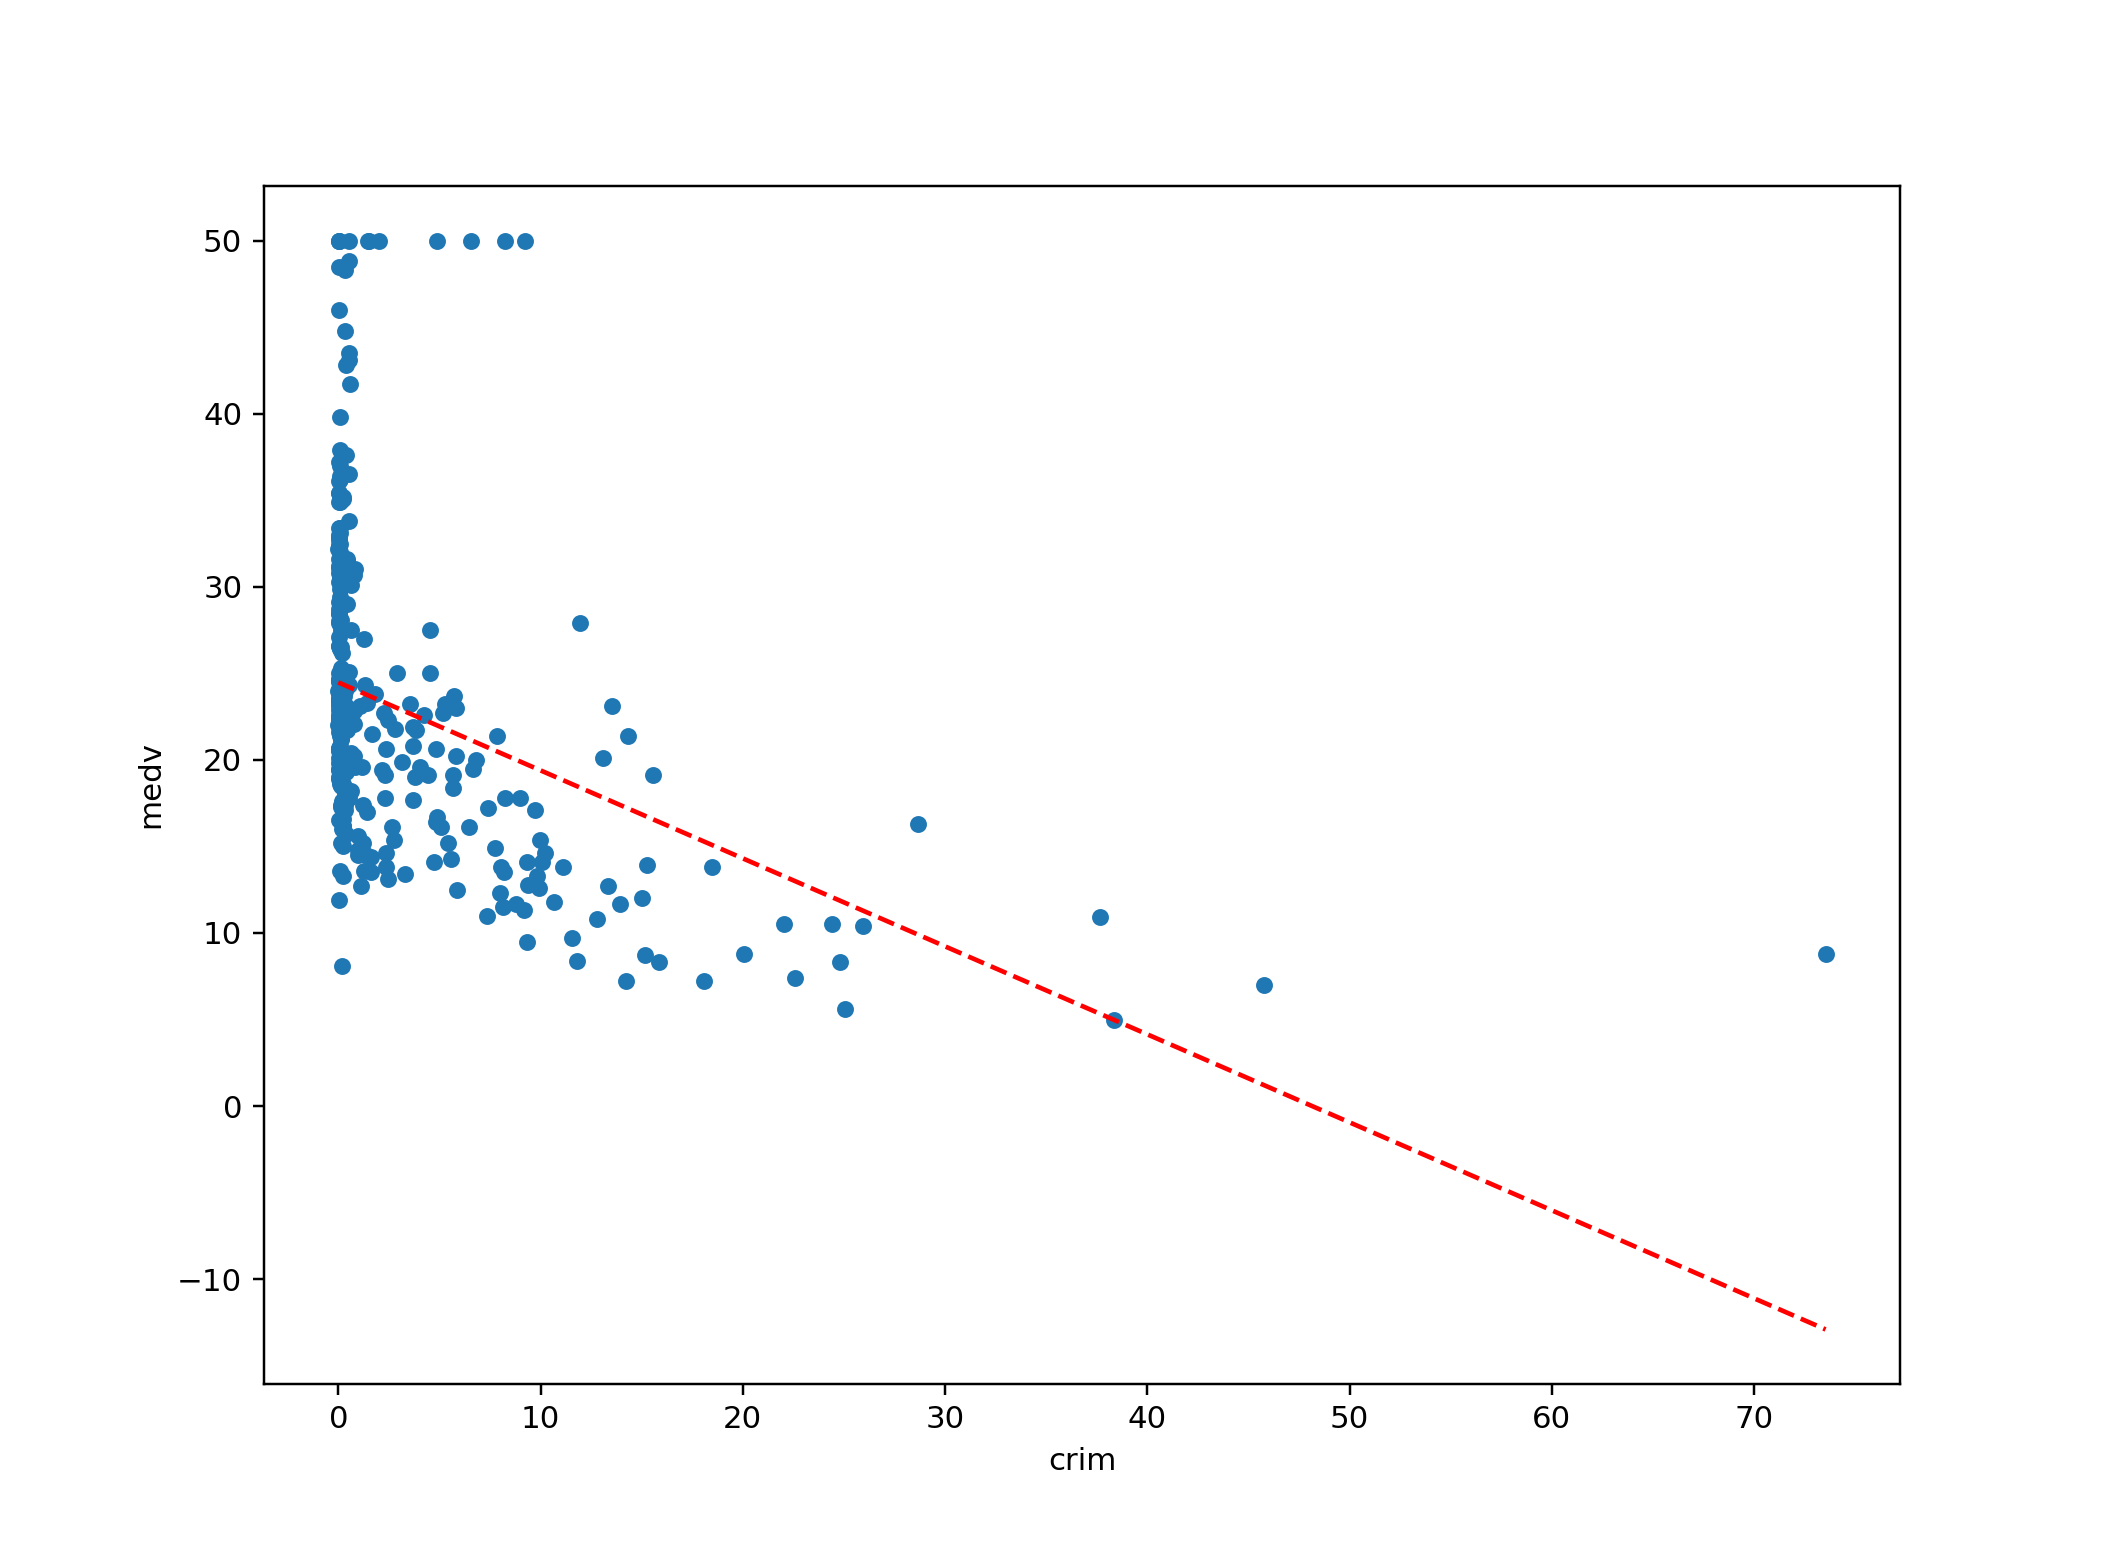

In [5]:
import numpy as np

# Create a polynomial to be drawn on the plot
coefficients = np.append(linear_regression.coef_, 
                         linear_regression.intercept_)
polynomial = np.poly1d(coefficients)

# Calculate the values for a selected range
x_values = np.linspace(0, boston_housing_df["crim"].max())
y_values = polynomial(x_values)

# Display a scatter plot: crim vs medv and regressed line
boston_housing_df.plot(x="crim", y="medv", kind="scatter")
plt.plot(x_values, y_values, color="red", linestyle="dashed")

In [6]:
from sklearn.metrics import mean_squared_error

y_pred = linear_regression.predict(boston_housing_df[["crim"]]) 
y_true = boston_housing_df["medv"]
mean_squared_error(y_true, y_pred)

69.970841435279354

### Multidimensional linear regression

An intuitive selection of the possibile predictor did not help to perform a regression of the median value in the area properly. For a low crime rate it looks better, but when it comes to really high crime rate, the predicted value is negative.

For the purposes of selecting predictors, we may consider the variables which have the highest correlation with the target variable.

In [7]:
# Calculate the Pearson correlation coefficients
boston_housing_df.corr()["medv"]

crim      -0.407454
zn         0.344842
indus     -0.473932
chas       0.204390
nox       -0.413054
rm         0.689598
age       -0.358888
dis        0.249422
rad       -0.352251
tax       -0.448078
ptratio   -0.481376
black      0.336660
lstat     -0.738600
medv       1.000000
Name: medv, dtype: float64

The absolute value of correlation coefficients is highest for *rm* (0.689598) and *lstat* (-0.738600). That means, these values are possibly the best predictors for the target variable and we can consider them in a 3D regression.

<IPython.core.display.Javascript object>


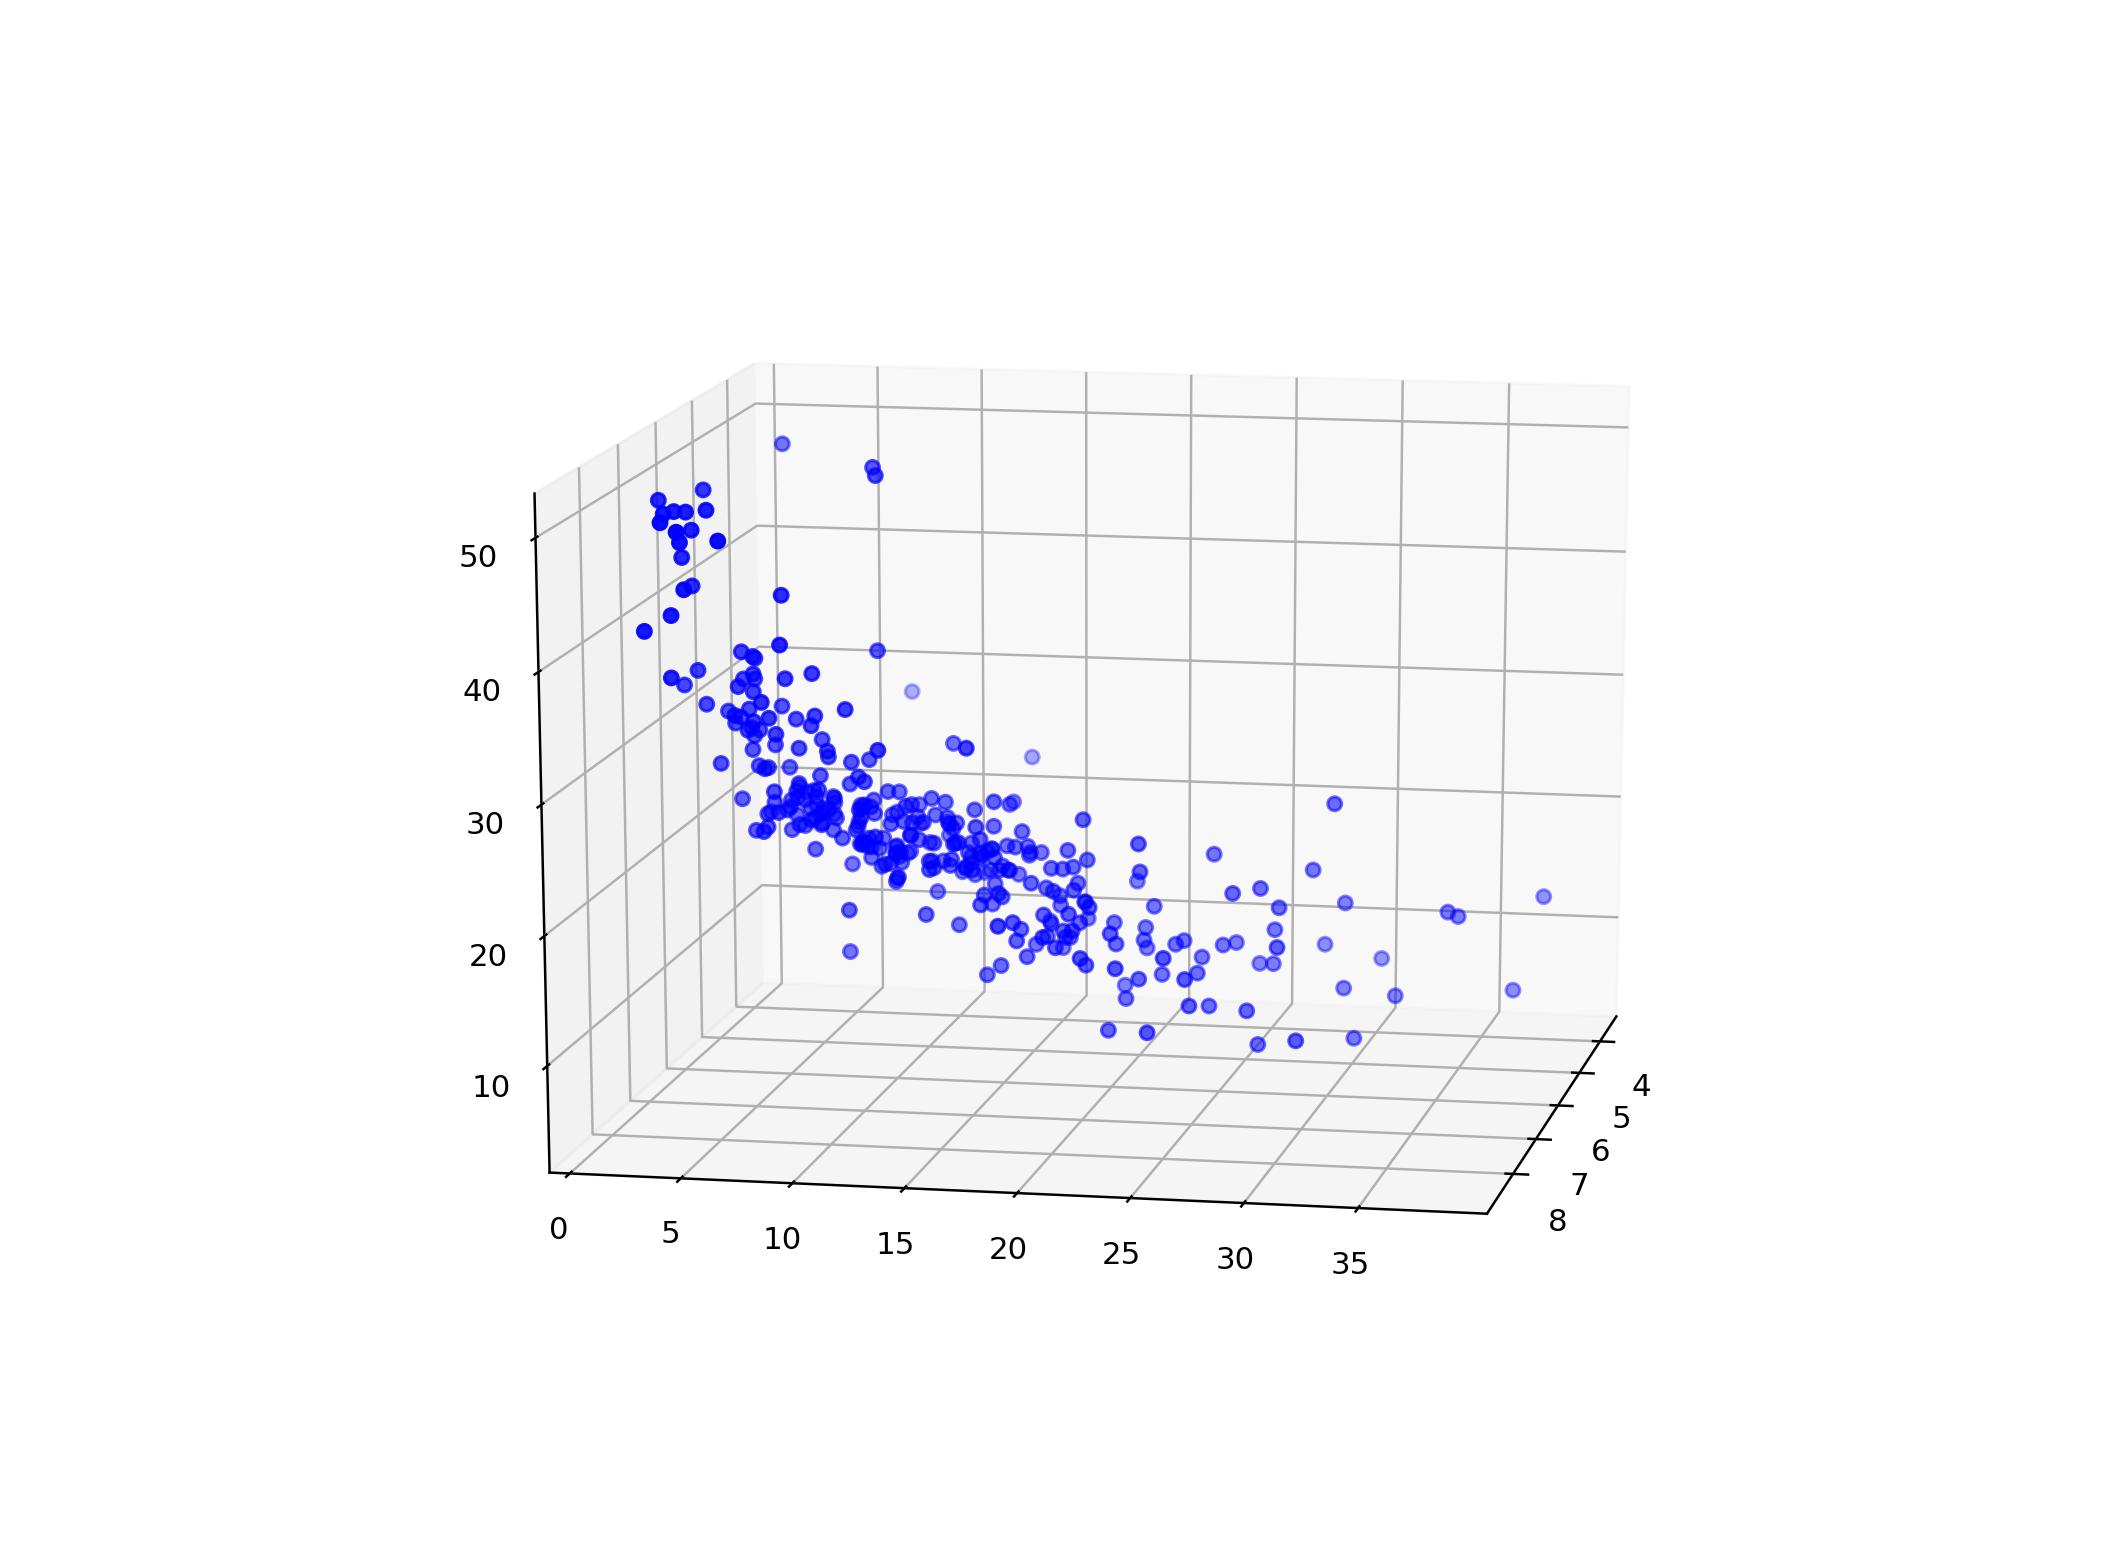

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Display 3D scatter: rm, lstat vs medv
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(boston_housing_df["rm"], boston_housing_df["lstat"], 
           boston_housing_df["medv"], c="blue")
plt.show()

In [9]:
# Create an instance of LinearRegression and find the coeffs
linear_regression = LinearRegression()
linear_regression.fit(X=boston_housing_df[["rm", "lstat"]], 
                      y=boston_housing_df["medv"])
linear_regression.coef_, linear_regression.intercept_ 

(array([ 4.92846523, -0.65639414]), 0.10394380202172826)

<IPython.core.display.Javascript object>


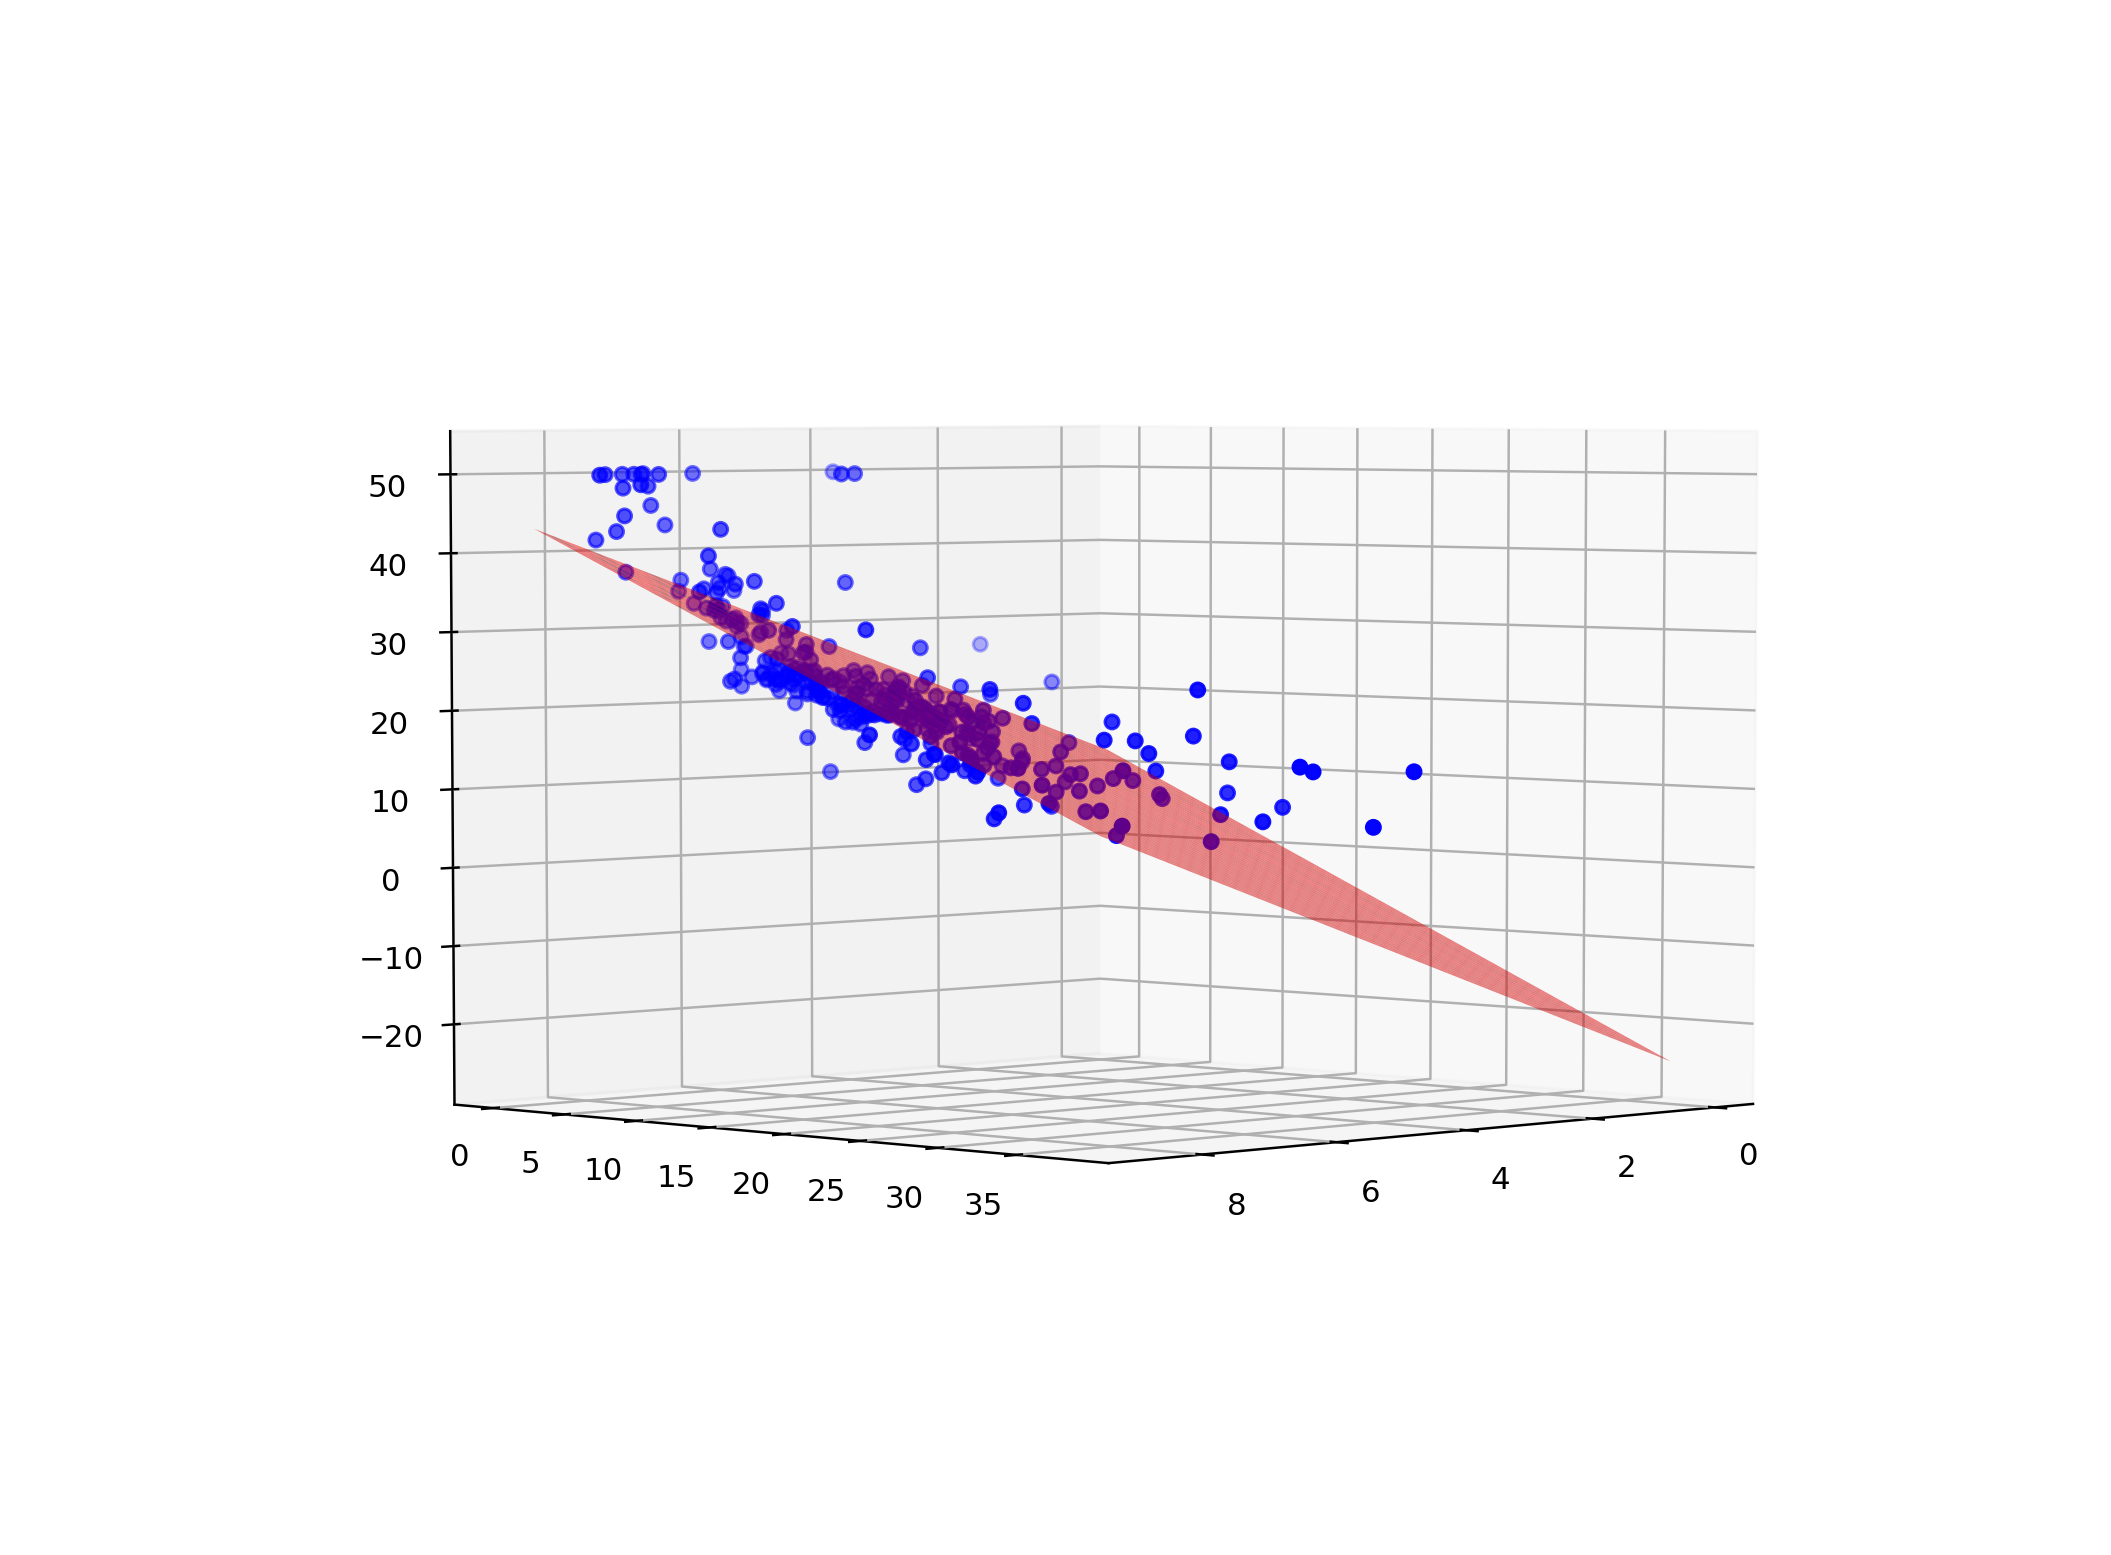

In [10]:
# Calculate coefficients of 2d polynomial
coefficients = np.append(linear_regression.coef_, 
                         linear_regression.intercept_)

# Calculate the values for a selected range
x = np.linspace(0, boston_housing_df["rm"].max())
y = np.linspace(0, boston_housing_df["lstat"].max())
x_values, y_values = np.meshgrid(x, y)
z_values = coefficients[0] * x_values + coefficients[1] * y_values + coefficients[2]

# Display 3D scatter: rm, lstat vs medv and regressed line
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(boston_housing_df["rm"], boston_housing_df["lstat"], 
           boston_housing_df["medv"], c="blue")
ax.plot_surface(x_values, y_values, z_values, linewidth=0.2, 
                color="red", alpha=0.5)
plt.show()

In [11]:
y_pred = linear_regression.predict(boston_housing_df[["rm", "lstat"]]) 
y_true = boston_housing_df["medv"]
mean_squared_error(y_true, y_pred)

30.679308942517149

### Linear regression on all the features

Applying linear regression is possible to be done on any number of dimensions. We may simply consider a linear regression on a full "Boston housing" dataset, in order to find if using high dimensional data makes the predictions better. 

In [12]:
boston_housing_nmedv_df = boston_housing_df.drop("medv", axis=1)

# Create an instance of LinearRegression and find the coeffs
linear_regression = LinearRegression()
linear_regression.fit(X=boston_housing_nmedv_df, 
                      y=boston_housing_df["medv"])
pd.Series(linear_regression.coef_,
          index=boston_housing_nmedv_df.keys())

crim       -0.052489
zn          0.047445
indus       0.053855
chas        3.784864
nox       -15.739657
rm          3.768832
age        -0.004627
dis        -1.548823
rad         0.328967
tax        -0.012866
ptratio    -0.856976
black       0.011666
lstat      -0.600315
dtype: float64

As a result we receive a dictionary with feature names as keys, and weights of a linear function as values. These weights are directly showing how much each feature participate in the final result. The higher the absolute value of a weight, the higher its contribution to the predicted value of the target variable.

In our example, features *nox*, *chas* and *rm* have the highest impact on the prediction. They mean:

* **nox** nitrogen oxides concentration (parts per 10 million).
* **chas** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **rm** average number of rooms per dwelling.

In [13]:
y_pred = linear_regression.predict(boston_housing_df.drop("medv", axis=1)) 
y_true = boston_housing_df["medv"]
mean_squared_error(y_true, y_pred)

22.389549423647889

Using such a simple model allows not only to check the importance of each feature, but also to understand the dataset, as long as its predictions are sufficient.

### Linear regression and scaling

It's shouldn't be surprising, after seeing how scaling the numerical values affects PCA, that we should consider the same process while working with linear regression. If we have different units for the features, the absolute value of our feature importances may be affected easily. If we compare the same feature represented with meters and centimeters, the importance factor should be 100 times higher, so we should consider scaling before doing anything with linear regression.

In [14]:
from sklearn.preprocessing import StandardScaler

# Scale the original dataset first, and then run regression
scaler = StandardScaler()
boston_housing_nmedv_df_scaled = scaler.fit_transform(
    boston_housing_nmedv_df)

# Create an instance of LinearRegression and find the coeffs
linear_regression = LinearRegression()
linear_regression.fit(X=boston_housing_nmedv_df_scaled, 
                      y=boston_housing_df["medv"])
pd.Series(linear_regression.coef_,
          index=boston_housing_nmedv_df.keys())

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


crim      -0.385336
zn         1.074185
indus      0.376319
chas       0.899277
nox       -1.806626
rm         2.649088
age       -0.129966
dis       -3.063798
rad        2.871566
tax       -2.194835
ptratio   -1.841288
black      1.008570
lstat     -4.236523
dtype: float64

It turns out, scaling changes a lot. Currently, the most important features are:

* **lstat**
* **dis**
* **rad**
* **rm**

In all the linear regression related tasks, we should definitely consider scaling the values, as it doesn't affect their distribution, but may influence our understanding of the produced results.

In [15]:
y_pred = linear_regression.predict(boston_housing_df.drop("medv", axis=1)) 
y_true = boston_housing_df["medv"]
mean_squared_error(y_true, y_pred)

517191.67325370625

## Logistic regression

Logistic regression is classification method which is a bit similar to linear regression, but used for categorical dependent variable. Instead of predicting a value of the target variable, which is assumed to be linear, logistic regression tries to predict the probabilities of a binary response. Some common examples are:

* marking an email as a spam
* marking given medical image as possible illness

For the classification we use a logistic function:

\begin{align}
p = \frac{1}{1 + e^{-(b_{0} + b_{1}x)}}
\end{align}

Let's consider the same dataset like in the example of linear regression. This time, we are not going to predict an exact price, but instead would like to know if given zone is expensive when it comes to a median of value. First of all, we need to consider which examples should be thought to be expensive.

In [16]:
# Show some statistics about the dataset
boston_housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,333.0,3.360341,7.352272,0.00632,0.07896,0.26169,3.67822,73.5341
zn,333.0,10.689189,22.674762,0.00000,0.00000,0.00000,12.50000,100.0000
indus,333.0,11.293483,6.998123,0.74000,5.13000,9.90000,18.10000,27.7400
chas,333.0,0.060060,0.237956,0.00000,0.00000,0.00000,0.00000,1.0000
nox,333.0,0.557144,0.114955,0.38500,0.45300,0.53800,0.63100,0.8710
rm,333.0,6.265619,0.703952,3.56100,5.88400,6.20200,6.59500,8.7250
age,333.0,68.226426,28.133344,6.00000,45.40000,76.70000,93.80000,100.0000
dis,333.0,3.709934,1.981123,1.12960,2.12240,3.09230,5.11670,10.7103
rad,333.0,9.633634,8.742174,1.00000,4.00000,5.00000,24.00000,24.0000
tax,333.0,409.279279,170.841988,188.00000,279.00000,330.00000,666.00000,711.0000


A mean of *medv* is 22.768769. By a simple thresholding we'll add another feature to our dataset, called **is_expensive** which will be set to 1 whenever the median value is higher than the mean.

In [17]:
# Get the mean value of the medv as a threshold
IS_EXPENSIVE_THRESHOLD = boston_housing_df["medv"].mean()

# Append a new column to the dataset
boston_housing_df["is_expensive"] = boston_housing_df["medv"]\
    .map(lambda x: int(x > IS_EXPENSIVE_THRESHOLD))
boston_housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,is_expensive
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,1


The perfect predictor for the *is_expensive* variable is naturally *medv* feature, but we are not going to consider it. In one of the previous examples we found out that column *lstat* has the highest absolute correlation with *medv*, so for the 2D example we will consider it as an independent variable. 

### 2D logistic regression

For the intuition, we are going to plot the *lstat* feature with *is_expensive* first, and then apply logistic regression to find, what is a threshold found by the algorithm itself.

<IPython.core.display.Javascript object>


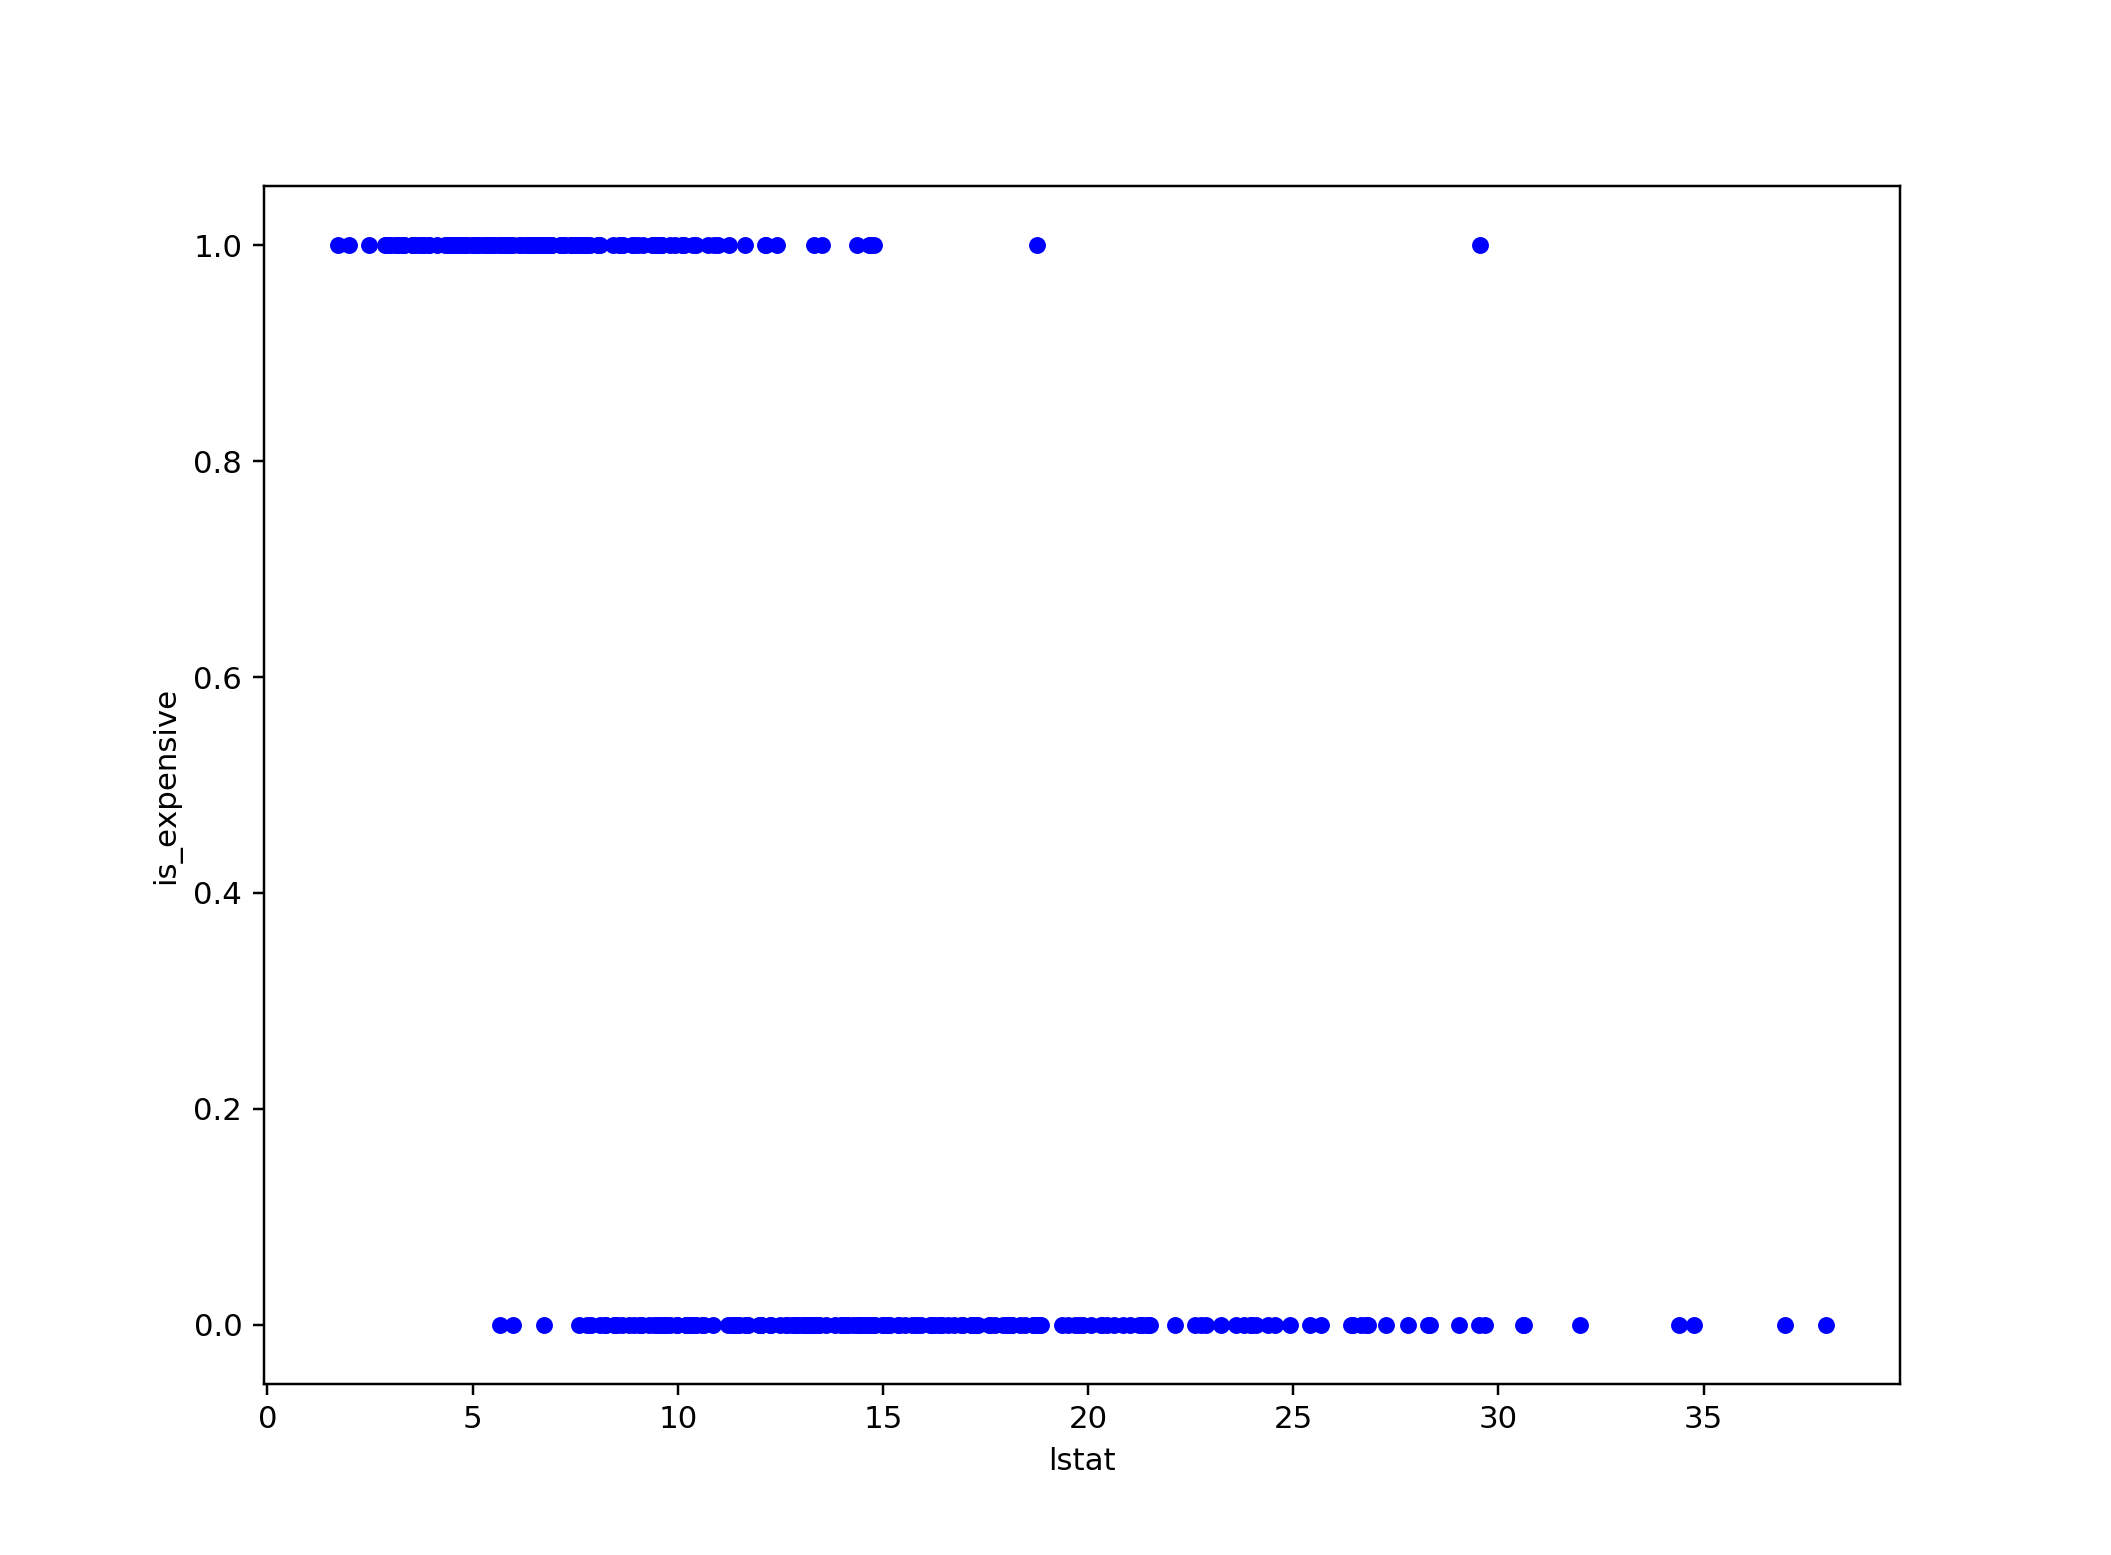

In [18]:
# Display a scatter plot: lstat vs is_expensive
boston_housing_df.plot.scatter(x="lstat", y="is_expensive", color="blue")

In [19]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression and fit it
logistic_regression = LogisticRegression()
logistic_regression.fit(X=boston_housing_df[["lstat"]], 
                        y=boston_housing_df["is_expensive"])

# Check the coefficients of the created model
logistic_regression.coef_, logistic_regression.intercept_

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([[-0.40160981]]), array([ 3.91209661]))

<IPython.core.display.Javascript object>


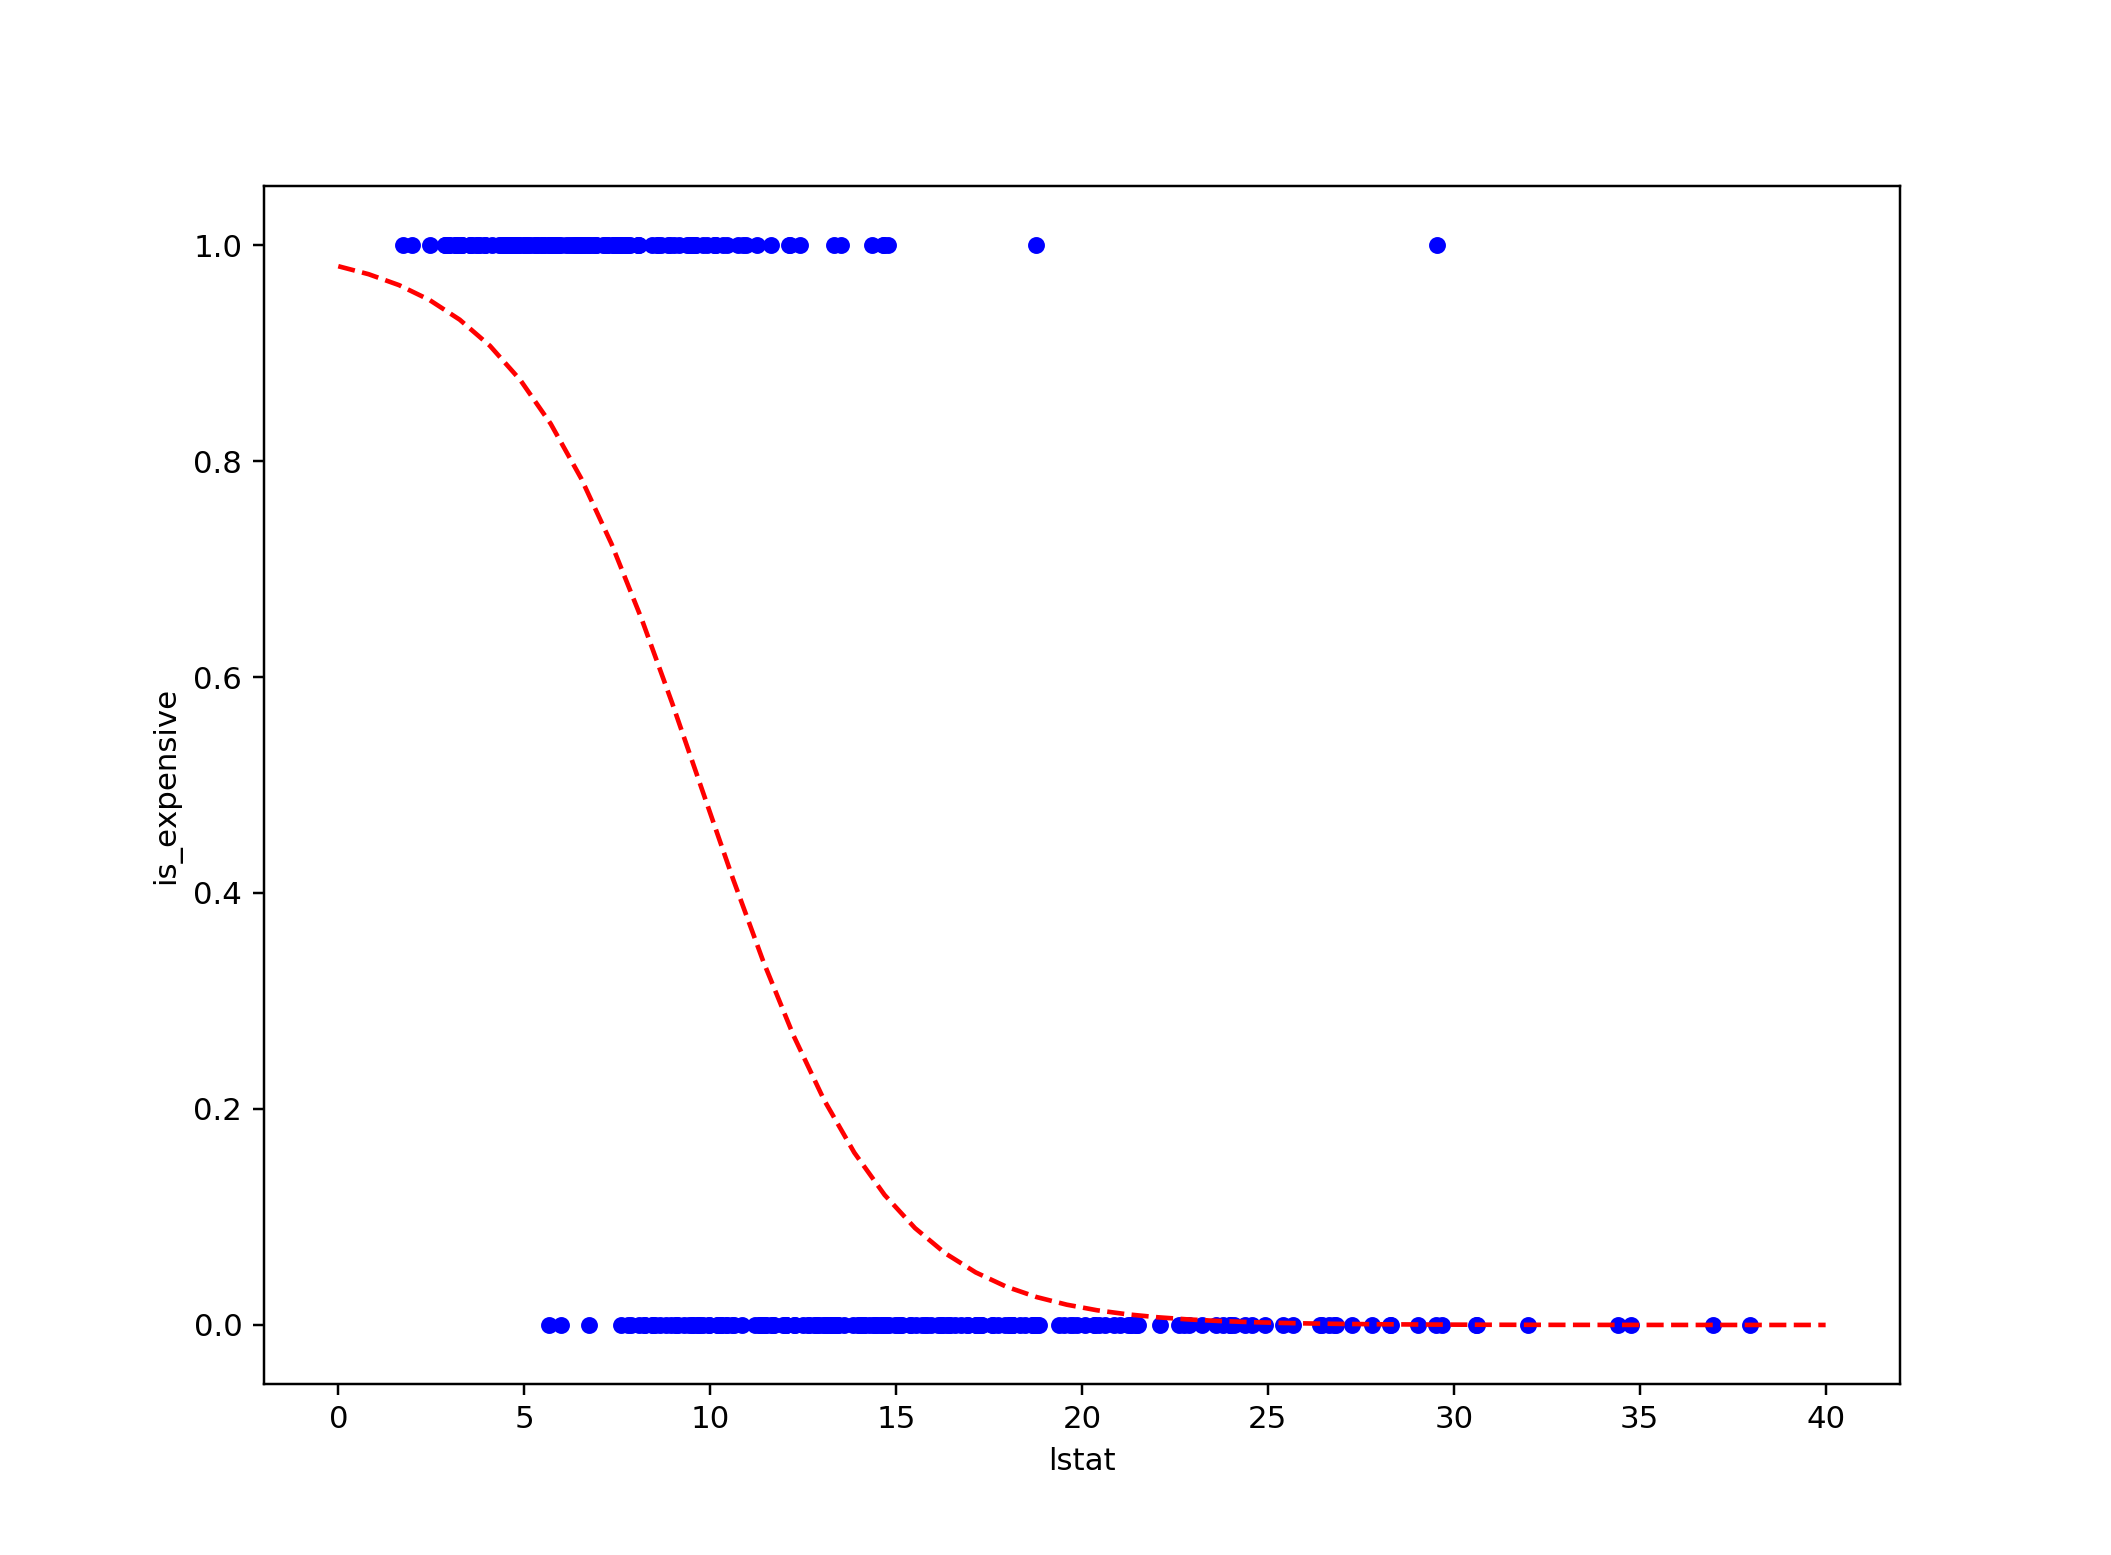

In [20]:
# Calculating the value of the logistic function
x_values = np.linspace(0, 40)
y_values = 1.0 / (1.0 + np.exp(-(logistic_regression.coef_[0] * x_values + logistic_regression.intercept_[0])))

# Display a scatter plot: lstat vs is_expensive and logistic function
boston_housing_df.plot(x="lstat", y="is_expensive", color="blue", kind="scatter")
plt.plot(x_values, y_values, color="red", linestyle="dashed")

With a simple thresholing we may perform a classification - if the *is_expensive* value returned by the classifier is higher than 50%, we can consider it to be expensive.

### Multidimensional logistic regression

Once again, we will consider an example with two independent variables, in order to visualize the predictions in the 3-dimensional space. As the most correlated values are typically the best predictors for the linear models, we are going to consider *lstat* together with *rm*.

In [21]:
# Scale the original dataset first, and then run regression
scaler = StandardScaler()
boston_housing_lstatrm_scaled = scaler.fit_transform(
    boston_housing_df[["lstat", "rm"]])

# Create an instance of LogisticRegression and fit it
logistic_regression = LogisticRegression()
logistic_regression.fit(X=boston_housing_lstatrm_scaled, 
                        y=boston_housing_df["is_expensive"])

# Check the coefficients of the created model
logistic_regression.coef_, logistic_regression.intercept_

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([[-2.64261694,  0.77361852]]), array([-0.94756396]))

<IPython.core.display.Javascript object>


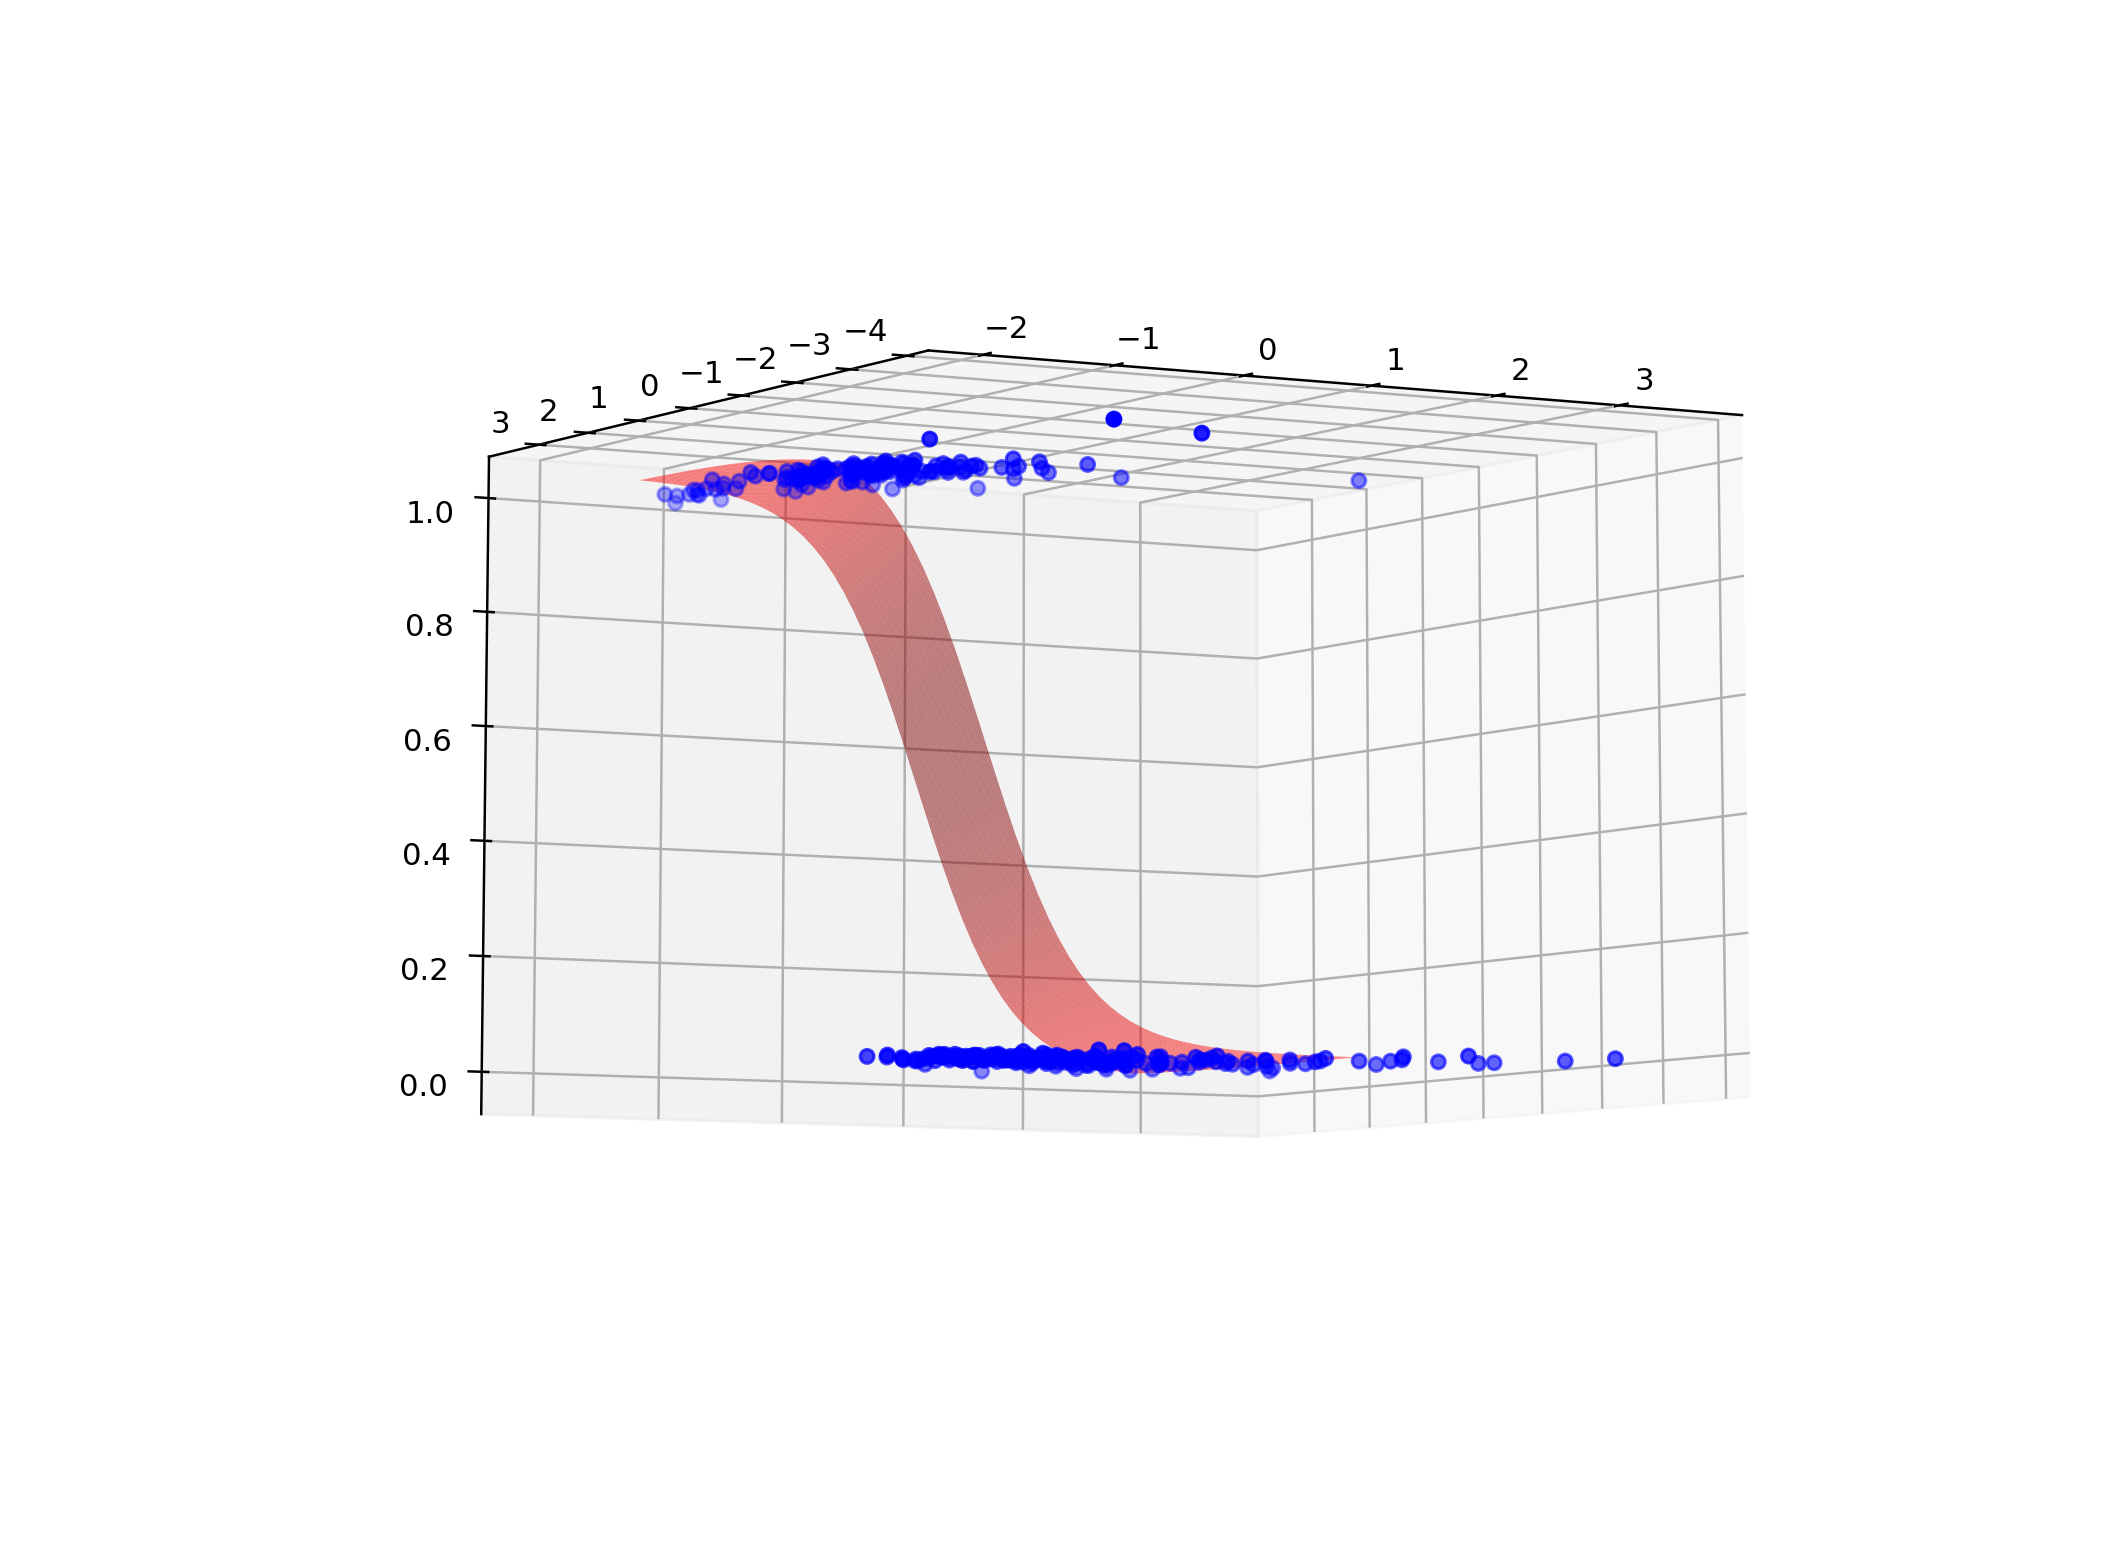

In [22]:
# Save the coefficients in a single array
coefficients = np.append(logistic_regression.coef_[0],
                         logistic_regression.intercept_[0])

# Calculate the values for a selected range
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
x_values, y_values = np.meshgrid(x, y)
z_values = 1.0 / (1.0 + np.exp(-(coefficients[0] * x_values + coefficients[1] * y_values + coefficients[2])))

# Display 3D scatter: rm, lstat vs is_expensive and logistic function
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(boston_housing_lstatrm_scaled[:, 0], 
           boston_housing_lstatrm_scaled[:, 1], 
           boston_housing_df["is_expensive"], c="blue")
ax.plot_surface(x_values, y_values, z_values, linewidth=0.2, 
                color="red", alpha=0.5)
plt.show()

### Logistic regression on all the features

Applying linear regression is possible to be done on any number of dimensions, in the same way like we did for linear regression. As a result we obtain a list of coefficients which may be thought as if they were the importance factors for all the features.

In [23]:
boston_housing_nexp_df = boston_housing_df.drop(["medv", "is_expensive"], axis=1)

# Scale the dataset
boston_housing_nexp_scaled = scaler.fit_transform(boston_housing_nexp_df)

# Create an instance of LinearRegression and find the coeffs
logistic_regression = LogisticRegression()
logistic_regression.fit(X=boston_housing_nexp_scaled, 
                        y=boston_housing_df["is_expensive"])
pd.Series(logistic_regression.coef_[0], 
          index=boston_housing_nexp_df.keys())

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


crim       0.006870
zn         0.284468
indus     -0.198780
chas       0.332109
nox       -0.390628
rm         0.664795
age       -0.557459
dis       -0.910623
rad        1.312113
tax       -0.832680
ptratio   -0.699425
black     -0.048613
lstat     -2.511480
dtype: float64

This time, variables **lstat** and **rad** contributes most to the model prediction.

## Bayesian rule sets

Having some feature importance is one of the ways of understanding how the model made the prediction. From the human point of view, it would be even better to reproduce the logical sequence of actions which led to given classification, to not only know which factors affected it, but also to improve the understanding of the data and the underlying rules. There are some tools which allow to create some sets of rules, and we are going to consider such method too.

Generating rule sets has a great advantage over some typical models. It allows to use categorical variables directly. Typically, we need to encode them with i.e. one hot encoder, what increases the dimensionality of the input space, and makes in harder to interpret the behaviour afterwards.

In [24]:
import ruleset as rs
import warnings

warnings.filterwarnings("ignore")

# Run the ruleset generation on the previously loaded dataset
ruleset_model = rs.BayesianRuleSet()
boston_housing_nexp_df.shape, boston_housing_df["is_expensive"].shape
ruleset_model.fit(X=boston_housing_nexp_df, 
                  y=boston_housing_df["is_expensive"].astype(bool).as_matrix())


** chain = 1, max at iter = 0 ** 
 accuracy = 0.7267267267267268, TP = 62,FP = 13, TN = 180, FN = 78
 old is -999999999.9, pt_new is -245.97730660000786, prior_ChsRules=-15.641051858256105, likelihood_1 = -44.61575803175435, likelihood_2 = -185.7204967099974
 
['indus<7.87', 'tax<403', '1.52<=indus', 'dis<5.4159', '193<=tax', '1.1296<=dis']
[1585]

** chain = 1, max at iter = 1 ** 
 accuracy = 0.7957957957957958, TP = 93,FP = 21, TN = 172, FN = 47
 old is -245.87730660000787, pt_new is -229.1031075769812, prior_ChsRules=-30.55910679657245, likelihood_1 = -66.94864240280515, likelihood_2 = -131.5953583776036
 
['indus<7.87', 'tax<403', '1.52<=indus', 'dis<5.4159', '193<=tax', '1.1296<=dis']
['lstat<9.62', '5.64<=lstat', '6.127<=rm', '4.97<=rm']
[1585, 1405]

** chain = 1, max at iter = 2 ** 
 accuracy = 0.8258258258258259, TP = 107,FP = 25, TN = 168, FN = 33
 old is -229.0031075769812, pt_new is -225.06794201425157, prior_ChsRules=-45.071696459839586, likelihood_1 = -77.55118931315326,

In [25]:
ruleset_model.predicted_rules

[1057]

In [26]:
# Show the predicted rules for the true class
for rule_key, (rule, _) in ruleset_model.rule_explainations.items():
    if rule_key not in ruleset_model.predicted_rules:
        continue
    print(rule)

['6.487<rm', 'rad<24', '6.29<rm', '1<rad']


# GLMs - Generalized Linear Models

GLMs are a family of linear methods which are commonly used in Data Science for the sake of their simplicity. These models are easily interpretable as they exaplicitly assign an importance to each input feature. The family includes both linear and logistic regression, but not only.

The variety of different linear models is very rich, and it may be divided into two groups:
* regression - i.e. linear regression, ridge regression
* classification - i.e. logistic regression, SVM

## SVM - Support Vector Machines

SVM is a method which is used for classification. It can be used to provide the maximum separating margin for a linearly separable dataset. It internally uses so called kernel trick that allow to operate in a higher dimensional space, without directly changing the input space.

The idea behind SVM is that out data, which isn't linearly separable in our input space, may be linearly separable in a higher dimensional space.

<IPython.core.display.Javascript object>


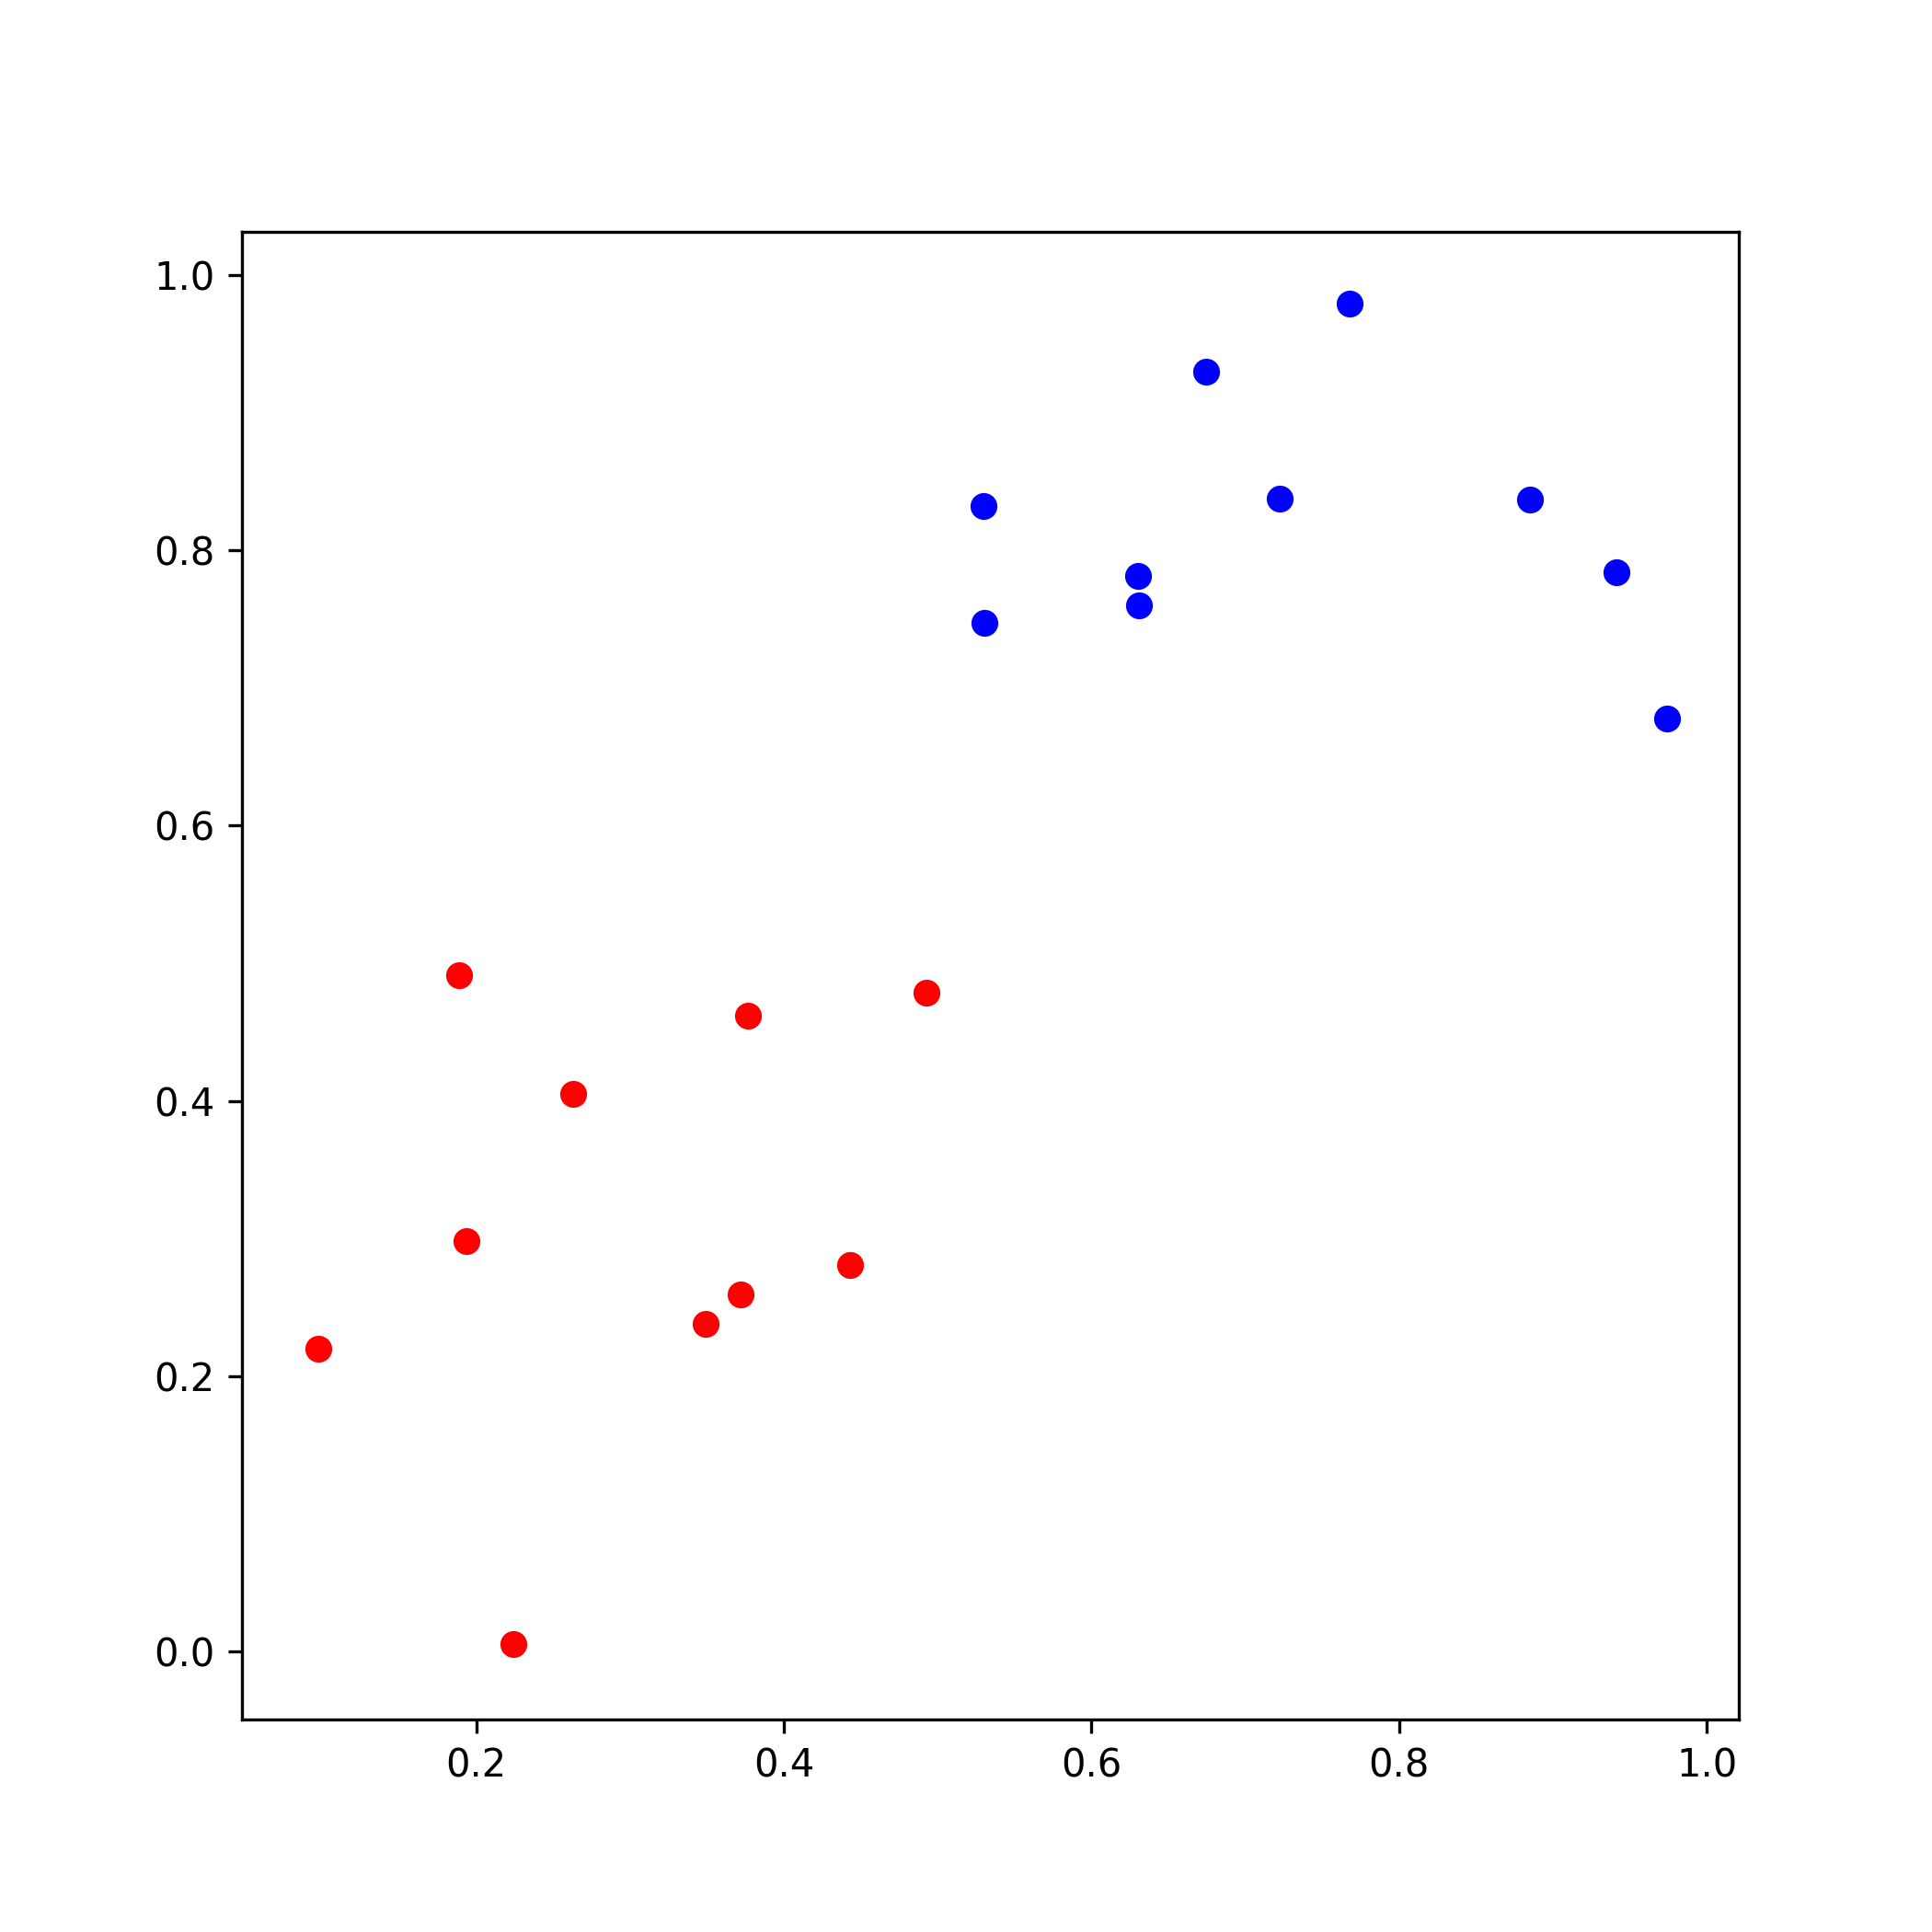

In [15]:
import numpy as np

A, B = np.random.random((10, 2)) * 0.5, np.random.random((10, 2)) * 0.5 + 0.5
plt.scatter(*zip(*A), color="red")
plt.scatter(*zip(*B), color="blue")

### Synthetic Financial Datasets For Fraud Detection

[Synthetic Financial Datasets For Fraud Detection](https://www.kaggle.com/ntnu-testimon/paysim1) is a dataset generated using the simulator called PaySim. It was motivated by the lack of public available datasets on financial services.

In [4]:
import pandas as pd

# Load the dataset from the attached CSV
financial_df = pd.read_csv(
    "./datasets/PS_20174392719_1491204439457_log.csv")
financial_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


There are a couple of features:

* **stepMaps** - a unit of time in the real world. In this case 1 step is 1 hour of time.
* **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
* **amount** - amount of the transaction in local currency
* **nameOrig** - customer who started the transaction
* **oldbalanceOrg** - initial balance before the transaction
* **newbalanceOrig** - customer's balance after the transaction.
* **nameDest** - recipient ID of the transaction.
* **oldbalanceDest** - initial recipient balance before the transaction.
* **newbalanceDest** - recipient's balance after the transaction.
* **isFraud** - identifies a fraudulent transaction (1) and non fraudulent (0)
* **isFlaggedFraud** - flags illegal attempts to transfer more than 200.000 in a single transaction.

In [7]:
financial_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
financial_df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


As we have a lot of non-fraudulent transactions and just a small number of the frauds, we are going to perform undersampling.

In [9]:
# Use undersampled dataset
financial_partial_df = pd.concat([
    financial_df[financial_df["isFraud"] == True],
    financial_df[financial_df["isFraud"] == False].sample(10000),
])

This time things are not going to be as easy as in the previous example. We need to encode some textual features to make them usable for the algorithm. For the column *type* is is fairly easy. This feature has several possible values, and we can convert them into dummy variables.

In [10]:
# Check all the possible types
financial_df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
# Create new dummy variables
for ttype in financial_df["type"].unique():
    financial_partial_df[ttype] = financial_df["type"].map(lambda x: int(x == ttype))
    
# Display some first rows
financial_partial_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,PAYMENT,TRANSFER,CASH_OUT,DEBIT,CASH_IN
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,0,1,0,0,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,0,0,1,0,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,0,1,0,0,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,0,0,1,0,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,0,1,0,0,0


Encoding customers is more complex. We could also try to create a separate feature for each customer, but for the first run we'll just consider the limited dataset.

### Training SVM for the classification of frauds

Scikit-learn already has a SVM implementation with various kernels. For the sake for explainability we are currently limited to just a linear kernel.

In [12]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Scale the original variables, before the training is applied
scaler = StandardScaler()
financial_partial_test = financial_partial_df.drop(
    ["type", "nameOrig", "nameDest", "isFraud", "isFlaggedFraud"], 
    axis=1)
financial_partial_scaled = scaler.fit_transform(financial_partial_test)

# Create and train the model
svm = LinearSVC(max_iter=100000, verbose=True, 
                class_weight="balanced")
svm.fit(X=financial_partial_scaled, 
        y=financial_partial_df["isFraud"])

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=True)

In [13]:
# Check the coefficients of SVM (shape: n_features)
svm.coef_, svm.intercept_

(array([[  0.18752545,  -1.83126113,  17.32395233, -12.37118439,
           2.8218429 ,  -3.23958196,   0.22555085,   1.82627914,
           1.72829433,   0.03193506,  -5.38272121]]), array([-0.47198438]))

In [14]:
# Calculate the feature importance
pd.Series(svm.coef_[0], 
          index=financial_partial_test.keys())

step               0.187525
amount            -1.831261
oldbalanceOrg     17.323952
newbalanceOrig   -12.371184
oldbalanceDest     2.821843
newbalanceDest    -3.239582
PAYMENT            0.225551
TRANSFER           1.826279
CASH_OUT           1.728294
DEBIT              0.031935
CASH_IN           -5.382721
dtype: float64

Our SVM was able to describe which features it found useful, but in order to understand the specific case of classification we would need to track the example. That's exactly the same like it was for the linear regression or logistic one. And that's the reason why we call this family of methods Generalized Linear Models, GLMs.